In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [31]:
df1 = pd.read_csv('Unemployment in India.csv')
df2 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [32]:
print("Dataset 1:")
df1.head()

Dataset 1:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [33]:
print("Dataset 2:")
df2.head()

Dataset 2:


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [34]:
print(df1.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [35]:
print(df2.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [36]:
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [37]:
df1.columns = ['State', 'Date', 'Frequency', 
               'Estimated Unemployment Rate (%)', 
               'Estimated Employed', 
               'Estimated Labour Participation Rate (%)', 
               'Area']

df2.columns = ['State', 'Date', 'Frequency', 
               'Estimated Unemployment Rate (%)', 
               'Estimated Employed', 
               'Estimated Labour Participation Rate (%)',
               'Area', 'longitude', 'latitude']

In [38]:
df1 = df1.drop(columns=['Area'])
df2 = df2.drop(columns=['Area', 'longitude', 'latitude'])

In [39]:
df = pd.concat([df1, df2], ignore_index=True)

In [40]:
df['Date'] = pd.to_datetime(df['Date'])

In [41]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   State                                    1007 non-null   object        
 1   Date                                     1007 non-null   datetime64[ns]
 2   Frequency                                1007 non-null   object        
 3   Estimated Unemployment Rate (%)          1007 non-null   float64       
 4   Estimated Employed                       1007 non-null   float64       
 5   Estimated Labour Participation Rate (%)  1007 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 48.6+ KB
None
State                                      28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employe

In [42]:
df.dropna(inplace=True)

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

In [45]:
grouped = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

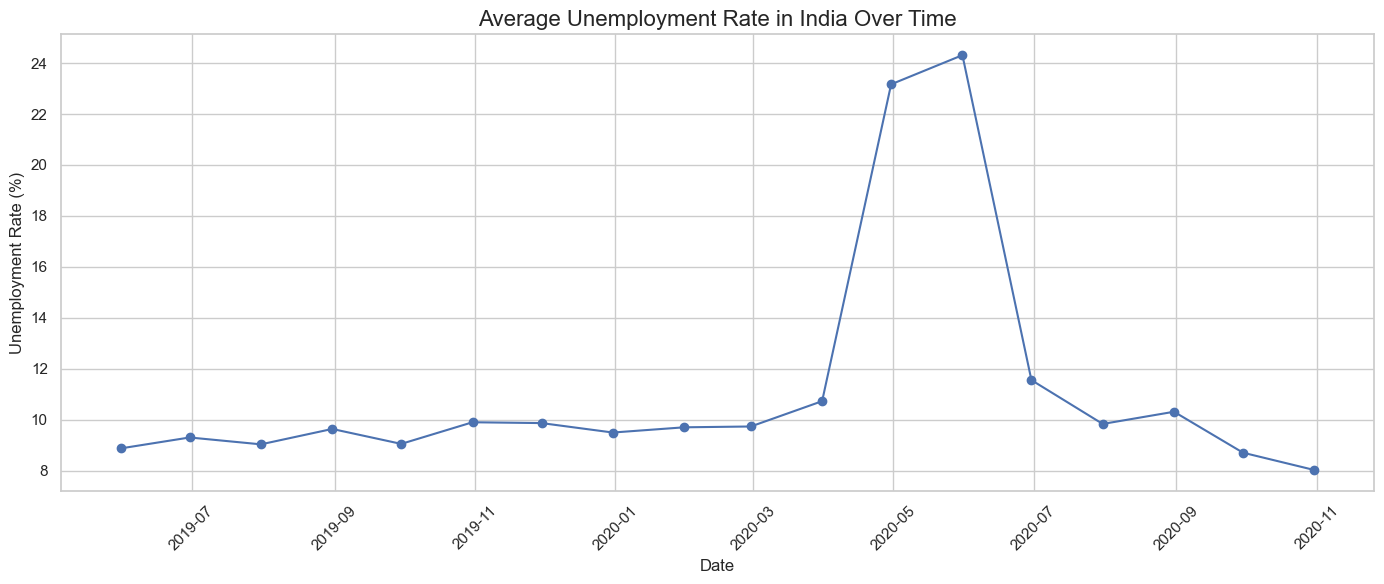

In [46]:
plt.plot(grouped.index, grouped.values, marker='o')
plt.title('Average Unemployment Rate in India Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
latest_date = df['Date'].max()

In [48]:
latest_df = df[df['Date'] == latest_date]

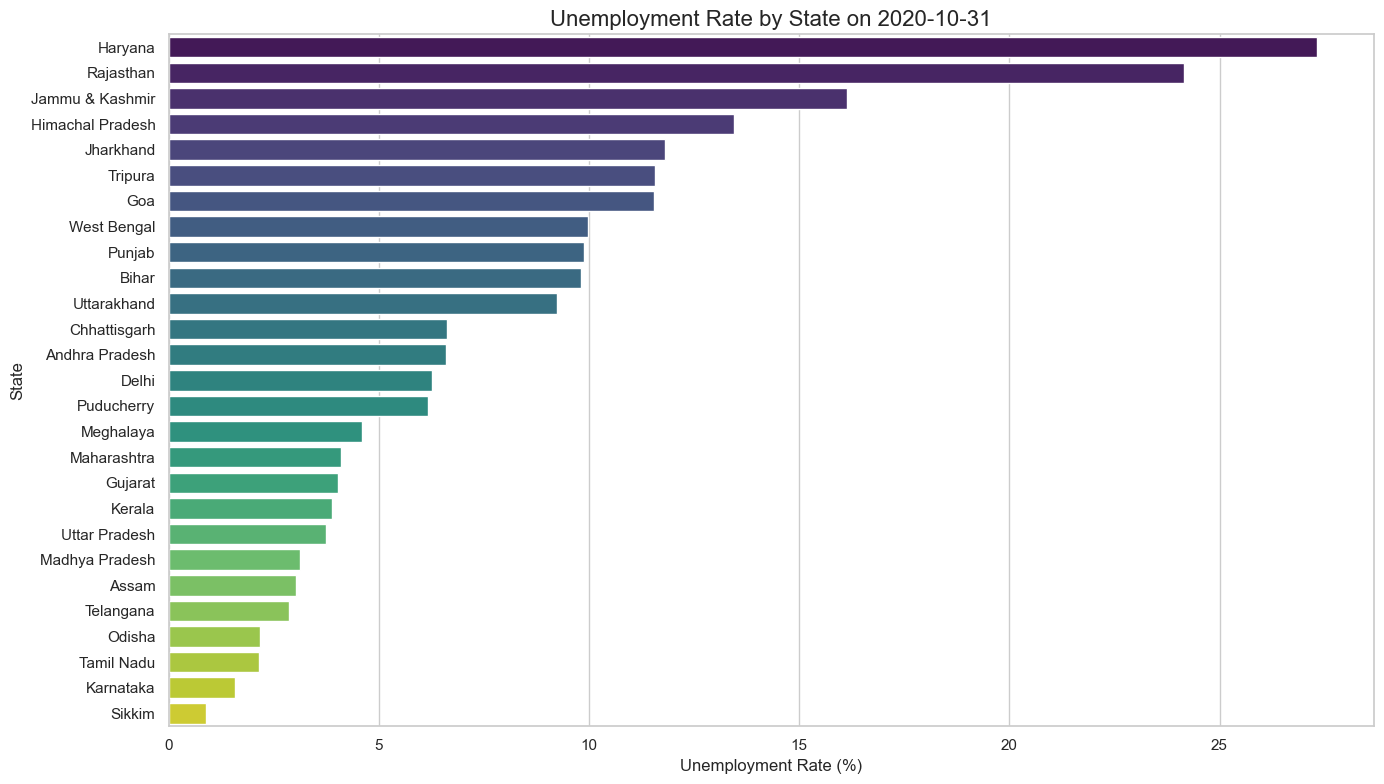

In [49]:
plt.figure(figsize=(14, 8))
sns.barplot(data=latest_df.sort_values('Estimated Unemployment Rate (%)', ascending=False), 
            x='Estimated Unemployment Rate (%)', y='State', palette='viridis')
plt.title(f'Unemployment Rate by State on {latest_date.date()}', fontsize=16)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

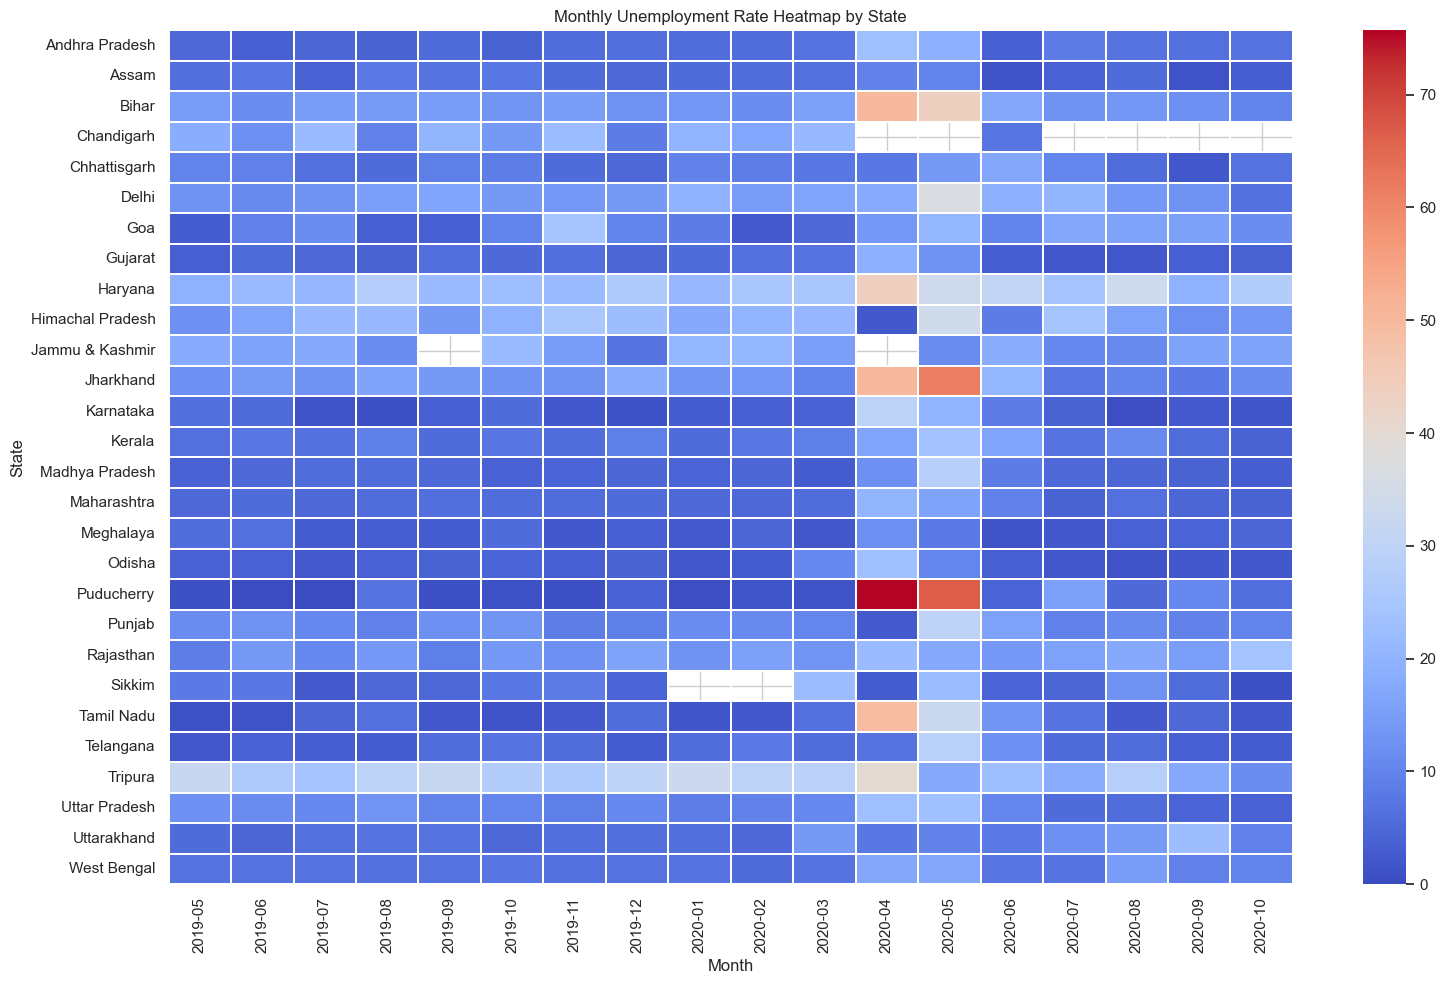

In [50]:
df['Month_Year'] = df['Date'].dt.to_period('M')
pivot_df = df.pivot_table(index='State', columns='Month_Year', values='Estimated Unemployment Rate (%)')
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_df, cmap='coolwarm', annot=False, linecolor='white', linewidths=0.1)
plt.title('Monthly Unemployment Rate Heatmap by State')
plt.xlabel('Month')
plt.ylabel('State')
plt.tight_layout()
plt.show()